#Using Python with Matplotlib to create a Cobew

##Summary

    * This code creates a basic spider (cobweb) chart with 11 segments and 6 levels.
    * The segments are labeled with numbers 1 through 11, arranged in a circular pattern.
    * The radial levels are represented by concentric rings, and the areas between the levels are filled with a light sky blue color.
    * The chart is displayed with labels around the edges and no radial labels inside the chart.

## Step 1: Install libraries (numpy, matplotlib)

First, install numpy:
[NumPy](https://en.wikipedia.org/wiki/NumPy) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**numpy as np**: This imports the NumPy library, which is a powerful library for numerical computing in Python, and gives it the alias np.

Next, install matplotlib: [Matplotlib](https://en.wikipedia.org/wiki/Matplotlib) is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.


**matplotlib.pyplot as plt**: This imports the pyplot module from Matplotlib, which is used for creating plots and visualizations in Python, and gives it the alias plt.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


##Step 2: Define the Number of Variables

**labels**: This is a NumPy array containing the labels for each section (or variable) of the spider (cobweb) chart. In this case, it's an array of strings representing the numbers 1 through 11.

**num_vars**: This calculates the number of variables (sections) by using len(labels), which gives the length of the labels array. Here, num_vars will be 11.

In [ ]:
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)


##Step 3: Create the Angle Array

**np.linspace**(0, 2 * np.pi, num_vars, endpoint=False): This function generates **num_vars** evenly spaced values between 0 and 2π2π (full circle in radians). The **endpoint=False** parameter ensures that the endpoint 2π2π is not included, so the first and last angles are not the same, which avoids overlapping.

**.tolist()**: Converts the NumPy array of angles into a regular Python list.

In [ ]:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


##Step 4: Complete the Loop

**angles += angles[:1]**: This adds the first angle (from the list) to the end of the angles list. This step "closes the loop" in the spider chart by ensuring that the plot goes all the way around and back to the starting point, forming a closed polygon.

In [ ]:
angles += angles[:1]


##Step 5: Define the Levels (Radial Levels)

**np.linspace(0, 6, num=6)**: This generates 6 evenly spaced values between 0 and 6, representing the levels (concentric circles) of the spider chart. Each level corresponds to a ring on the chart.

**.tolist()**: Converts the NumPy array of levels into a Python list.

In [ ]:
levels = np.linspace(0, 6, num=6).tolist()


##Step 6: Create the Plot

**plt.subplots**(figsize=(6, 6), subplot_kw=dict(polar=True)):

**fig**: The figure object that contains the plot.

**ax**: The axes object, which in this case is set to a polar coordinate system (spider chart) because of the subplot_kw=dict(polar=True) argument.

**figsize=(6, 6)**: Sets the size of the figure to 6 inches by 6 inches.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


##Step 7: Set the Labels for Each Axis

**plt.xticks**(angles[:-1], labels, color='grey', size=8):

**angles**[:-1]: The angles are used to position the labels around the chart. The [:-1] excludes the last repeated angle to avoid double labeling.

**labels**: Assigns the corresponding labels to each angle.

**color**='grey', size=8: Sets the color and size of the labels.

In [ ]:
plt.xticks(angles[:-1], labels, color='grey', size=8)


##Step 8: Draw the Levels

**for level in levels**:: Iterates over each radial level.

ax.fill(angles, [level]*len(angles), color='skyblue', alpha=0.1):

*   ax.fill(): Fills the area between the angles with a color.
*   angles: The angles that define the vertices of the polygon.
*   [level]*len(angles): Creates a list where all the entries are the same level value, ensuring the polygon is at a constant radial distance.
*   color='skyblue', alpha=0.1: Fills the area with a sky blue color at 10% opacity (alpha=0.1).

In [ ]:
for level in levels:
    ax.fill(angles, [level]*len(angles), color='skyblue', alpha=0.1)


##Step 9: Optional - Hide the Radial Labels

**ax.set_yticklabels([])**: Removes the radial labels (labels that would appear on the concentric circles), which is optional. It leaves the chart cleaner, focusing on the filled areas.

In [ ]:
ax.set_yticklabels([])  # Optional: Hide radial labels


##Step 10: Display the Plot

**plt.show()**: Displays the generated plot on the screen. This is the final step that renders the spider chart.

In [ ]:
plt.show()


##Code sample 1:

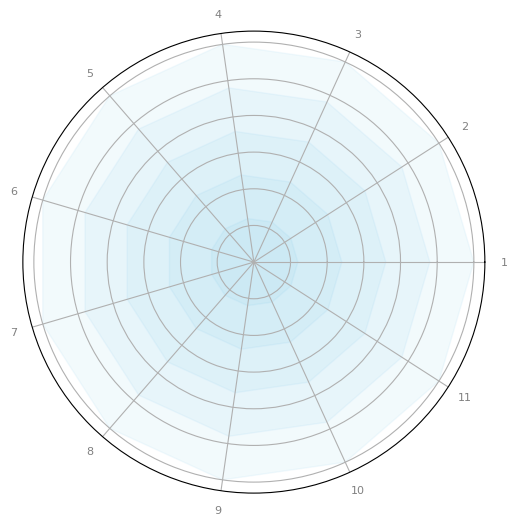

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of variables
labels=np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Create the angle array
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Levels
levels = np.linspace(0, 6, num=6).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='grey', size=8)

# Draw the levels
for level in levels:
    ax.fill(angles, [level]*len(angles), color='skyblue', alpha=0.1)

ax.set_yticklabels([]) # Optional: Hide radial labels
plt.show()


#Modify colours by segment

To modify colors by segment and apply different intensities of the same color by level in a spider (cobweb) chart using Python with Matplotlib, you can follow these steps:

**Segments Colors**: The colors array is created using a colormap (in this case, viridis). Each segment will have a different base color from this colormap.

**Intensity Variation**: The color intensity for each level is adjusted using the expression color_intensity = colors[j] * (0.5 + 0.5 * level / 6.0). This scales the color intensity from dark (level 1) to light (level 6).

**Filling Segments**: The ax.fill method is used to fill the areas between the angles that define each segment. The color is applied with varying intensities depending on the level.

**Removing Radial Labels**: ax.set_yticklabels([]) hides the labels for the levels.

**Plot Display**: Finally, the chart is displayed using plt.show().

##Code sample 2:

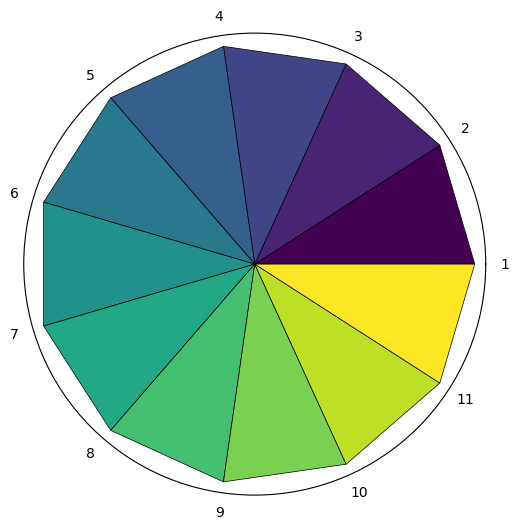

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels for the segments (11 sections)
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Define the angles for each segment
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Define levels and colors
levels = np.linspace(0, 6, num=6).tolist()
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Use a colormap (viridis) for segment colors

# Create the figure and polar axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='black', size=10)

# Draw the levels with different intensities of color for each segment
for i, level in enumerate(levels):
    for j in range(num_vars):
        # Adjust color intensity by level (higher levels are lighter)
        color_intensity = colors[j] * (0.5 + 0.5 * level / 6.0)
        ax.fill([angles[j], angles[j+1], angles[j+1], angles[j]],
                [0, 0, level, level], color=color_intensity, edgecolor='black', linewidth=0.5)

# Hide the radial labels
ax.set_yticklabels([])

# Draw the gridlines (optional)
ax.grid(False)

# Show the plot
plt.show()


#Segmentation

To achieve the spider (cobweb) chart where **each segment** has **its own color**, and the levels are **separated by fine lines**, with the shading starting from the lightest at level 1 to the darkest at level 6 (one color per segment), you can modify the script as follows:

Explanation of the Modifications:

**Segment Colors**: The colors array uses the viridis colormap, which assigns a base color to each segment. Each segment's base color is then adjusted in intensity according to the level.

**Shading by Level**:
        The color_intensity variable is calculated using (level / levels), meaning level 1 will have the lightest shade (1/6 of the color intensity), and level 6 will have the darkest shade (full color intensity).

**Separating Levels with Fine Lines**:
        ax.plot(angles, [level] * (num_vars + 1), color='black', linewidth=0.5) draws fine lines across each level, giving a clear separation between them.

**Filling Segments bold text**:
        ax.fill is used to fill the areas between the angles for each segment and level with the appropriate color intensity.

**Result**:
        The spider chart will have each segment shaded in its unique color, starting from light (level 1) to dark (level 6). Fine lines will clearly separate the levels.

##Code sample 3:

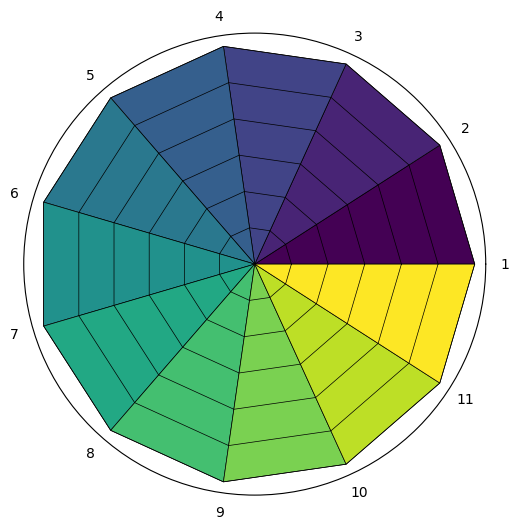

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels for the segments (11 sections)
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Define the angles for each segment
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Define levels and colors
levels = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Use a colormap (viridis) for segment colors

# Create the figure and polar axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='black', size=10)

# Draw the levels with different intensities of color for each segment
for level in range(1, levels + 1):
    for j in range(num_vars):
        # Adjust color intensity by level (level 1 lightest, level 6 darkest)
        color_intensity = colors[j] * (level / levels)
        ax.fill([angles[j], angles[j+1], angles[j+1], angles[j]],
                [0, 0, level, level], color=color_intensity, edgecolor='black', linewidth=0.5)

# Draw fine lines to separate the levels
for level in range(1, levels + 1):
    ax.plot(angles, [level] * (num_vars + 1), color='black', linewidth=0.5)

# Hide the radial labels
ax.set_yticklabels([])

# Draw the gridlines (optional)
ax.grid(False)

# Show the plot
plt.show()


#Updated Script with Clockwise Numbering

 It's possible to make the numbering clockwise on the spider (cobweb) chart. By default, Matplotlib plots the angles counterclockwise, but you can easily adjust this by modifying the angles calculation.

Key Changes for Clockwise Numbering:

**Reversing the Angles**:
        The angles array is reversed with angles = angles[::-1]. This makes the chart plot the segments in a clockwise direction instead of the default counterclockwise direction.

**Labeling**:
        The labels for each segment are automatically adjusted to follow the clockwise order.

##Code sample 4:

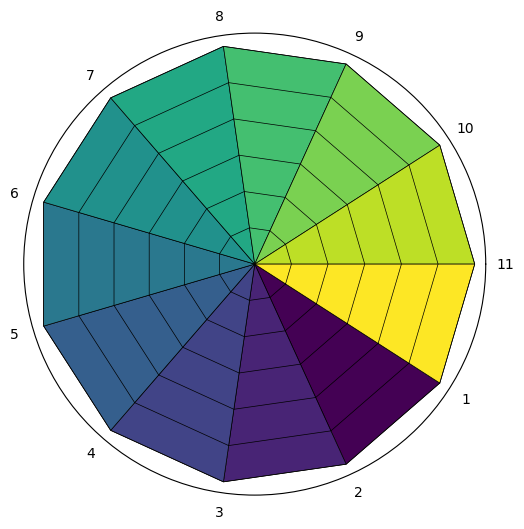

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels for the segments (11 sections)
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Define the angles for each segment in a clockwise direction
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles = angles[::-1]  # Reverse the order to make it clockwise

# Complete the loop
angles += angles[:1]

# Define levels and colors
levels = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Use a colormap (viridis) for segment colors

# Create the figure and polar axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='black', size=10)

# Draw the levels with different intensities of color for each segment
for level in range(1, levels + 1):
    for j in range(num_vars):
        # Adjust color intensity by level (level 1 lightest, level 6 darkest)
        color_intensity = colors[j] * (level / levels)
        ax.fill([angles[j], angles[j+1], angles[j+1], angles[j]],
                [0, 0, level, level], color=color_intensity, edgecolor='black', linewidth=0.5)

# Draw fine lines to separate the levels
for level in range(1, levels + 1):
    ax.plot(angles, [level] * (num_vars + 1), color='black', linewidth=0.5)

# Hide the radial labels
ax.set_yticklabels([])

# Draw the gridlines (optional)
ax.grid(False)

# Show the plot
plt.show()


#Updated Script with Number 1 at the Top Center and Clockwise Numbering:

To make the numbering start with 1 at the center top and proceed clockwise, you just need to adjust the angle calculation slightly.

Key Adjustments:

**Angle Adjustment**:
        angles = [(angle + np.pi / 2) % (2 * np.pi) for angle in angles] shifts the starting point of the angles so that the first segment is at the top center (corresponding to π/2π/2 radians or 90 degrees).

**Reversing the Order for Clockwise Numbering**:
        The angles are reversed with angles = angles[::-1] to make the numbering proceed clockwise.

**Finalizing the Angles**:
        The angles list is completed with angles += angles[:1] to close the loop on the plot.

Code sample 5:

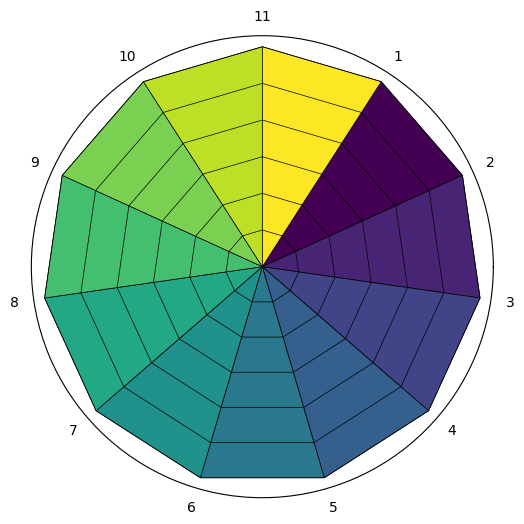

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels for the segments (11 sections)
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Define the angles for each segment in a clockwise direction, starting from the top (pi/2)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles = [(angle + np.pi / 2) % (2 * np.pi) for angle in angles]  # Adjust to start from top (pi/2)
angles = angles[::-1]  # Reverse to make clockwise

# Complete the loop
angles += angles[:1]

# Define levels and colors
levels = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Use a colormap (viridis) for segment colors

# Create the figure and polar axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='black', size=10)

# Draw the levels with different intensities of color for each segment
for level in range(1, levels + 1):
    for j in range(num_vars):
        # Adjust color intensity by level (level 1 lightest, level 6 darkest)
        color_intensity = colors[j] * (level / levels)
        ax.fill([angles[j], angles[j+1], angles[j+1], angles[j]],
                [0, 0, level, level], color=color_intensity, edgecolor='black', linewidth=0.5)

# Draw fine lines to separate the levels
for level in range(1, levels + 1):
    ax.plot(angles, [level] * (num_vars + 1), color='black', linewidth=0.5)

# Hide the radial labels
ax.set_yticklabels([])

# Draw the gridlines (optional)
ax.grid(False)

# Show the plot
plt.show()


#Updated Script with Increased Size and Quality:

To increase the image size and quality when downloading the chart, you can adjust the figsize parameter and the dpi (dots per inch) setting in Matplotlib.

Key Adjustments:

**Figsize**:
        The figsize=(30, 30) increases the size of the figure substantially. This is 30 inches by 30 inches, which is 5 times larger than a typical 6x6 figure. You can adjust this further depending on your needs.

**DPI (Dots Per Inch)**:
        dpi=300 increases the resolution of the image. This is particularly important when saving or exporting the chart to ensure high-quality output.

**Font Size and Line Width**:
        The font size (size=20) for the labels and the linewidth=1.0 are increased to ensure they look sharp and proportional even at a larger size.

**Saving the Plot**:
        plt.savefig('spider_chart_high_quality.png', dpi=300, bbox_inches='tight') saves the plot as a high-resolution PNG file. You can adjust the dpi and bbox_inches to control the quality and margins of the saved image.

**Result**:

Running this script will generate a large, high-resolution spider chart with segment 1 at the top center, numbered clockwise. The image will be saved with excellent quality, suitable for printing or high-resolution displays.

You can adjust the figsize and dpi according to your specific requirements to get the best possible image quality.

##Code sample 5:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels for the segments (11 sections)
labels = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
num_vars = len(labels)

# Define the angles for each segment in a clockwise direction, starting from the top (pi/2)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles = [(angle + np.pi / 2) % (2 * np.pi) for angle in angles]  # Adjust to start from top (pi/2)
angles = angles[::-1]  # Reverse to make clockwise

# Complete the loop
angles += angles[:1]

# Define levels and colors
levels = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))  # Use a colormap (viridis) for segment colors

# Create the figure and polar axis with increased size and dpi for better quality
fig, ax = plt.subplots(figsize=(30, 30), subplot_kw=dict(polar=True), dpi=300)
plt.xticks(angles[:-1], labels, color='black', size=20)

# Draw the levels with different intensities of color for each segment
for level in range(1, levels + 1):
    for j in range(num_vars):
        # Adjust color intensity by level (level 1 lightest, level 6 darkest)
        color_intensity = colors[j] * (level / levels)
        ax.fill([angles[j], angles[j+1], angles[j+1], angles[j]],
                [0, 0, level, level], color=color_intensity, edgecolor='black', linewidth=1.0)

# Draw fine lines to separate the levels
for level in range(1, levels + 1):
    ax.plot(angles, [level] * (num_vars + 1), color='black', linewidth=1.0)

# Hide the radial labels
ax.set_yticklabels([])

# Draw the gridlines (optional)
ax.grid(False)

# Save the plot with high resolution
plt.savefig('spider_chart_high_quality.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
